In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Twitter API Keys
consumer_key = "############"
consumer_secret = "##########"
access_token = "################"
access_token_secret = "###############"
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Twitter accounts being pulled
source_accounts = ['@BBC', "@CBSNews" , "@CNN", "@FoxNews", '@nytimes']

# Array for holding the sentiment

sentiments = []

In [3]:
for source in source_accounts:
    counter = 0   
    for x in range(1,6):
        public_tweets = api.user_timeline(source, page = x)
        
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            counter = counter + 1

            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                            'Source':source,
                              'tweets ago':counter}) 

In [37]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Source,tweets ago
0,0.3818,Fri Nov 03 17:31:05 +0000 2017,0.843,0.000,0.157,@BBC,1
1,0.0000,Fri Nov 03 17:03:04 +0000 2017,1.000,0.000,0.000,@BBC,2
2,0.0000,Fri Nov 03 17:01:02 +0000 2017,1.000,0.000,0.000,@BBC,3
3,0.7906,Fri Nov 03 16:32:04 +0000 2017,0.708,0.000,0.292,@BBC,4
4,0.0000,Fri Nov 03 16:01:05 +0000 2017,1.000,0.000,0.000,@BBC,5
5,0.3612,Fri Nov 03 15:25:06 +0000 2017,0.839,0.000,0.161,@BBC,6
6,0.4019,Fri Nov 03 15:09:46 +0000 2017,0.863,0.000,0.137,@BBC,7
7,0.0000,Fri Nov 03 14:05:17 +0000 2017,1.000,0.000,0.000,@BBC,8
8,0.6439,Fri Nov 03 14:04:55 +0000 2017,0.653,0.000,0.347,@BBC,9
9,0.8658,Fri Nov 03 14:04:50 +0000 2017,0.662,0.000,0.338,@BBC,10


In [5]:
BBC_Plot = sentiments_pd[sentiments_pd['Source']=='@BBC']
CBS_Plot = sentiments_pd[sentiments_pd['Source']=='@CBSNews']
CNN_Plot = sentiments_pd[sentiments_pd['Source']=='@CNN']
Fox_Plot = sentiments_pd[sentiments_pd['Source']=='@FoxNews']
NYT_Plot = sentiments_pd[sentiments_pd['Source']=='@nytimes']

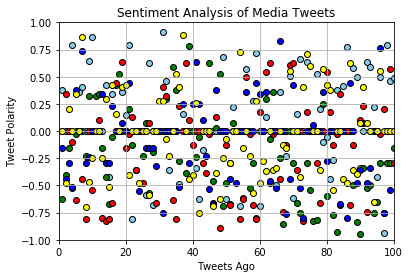

In [6]:
plt.scatter( x = BBC_Plot['tweets ago'] , y = BBC_Plot['Compound'], c = 'skyblue',linewidth = 1,edgecolor = 'black')
plt.scatter( x = CBS_Plot['tweets ago'] , y = CBS_Plot['Compound'], c = 'green',linewidth = 1,edgecolor = 'black')
plt.scatter( x = CNN_Plot['tweets ago'] , y = CNN_Plot['Compound'], c = 'red',linewidth = 1,edgecolor = 'black')
plt.scatter( x = Fox_Plot['tweets ago'] , y = Fox_Plot['Compound'], c = 'blue',linewidth = 1,edgecolor = 'black')
plt.scatter( x = NYT_Plot['tweets ago'] , y = NYT_Plot['Compound'], c = 'yellow',linewidth = 1,edgecolor = 'black')
plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.grid(True)
plt.show()

In [33]:
Overall = sentiments_pd.groupby('Source').sum()
Overall = Overall.reset_index(drop = True)
index = Overall.index
polarity = Overall.Compound
bar_width = 1
Overall

,Compound,Negative,Neutral,Positive,tweets ago
0,7.5158,85.613,5.440,8.946,5050
1,-18.8441,81.958,13.831,4.211,5050
2,-11.8172,84.993,10.435,4.571,5050
3,-7.4642,85.966,8.728,5.306,5050
4,-2.9273,84.811,7.861,7.328,5050


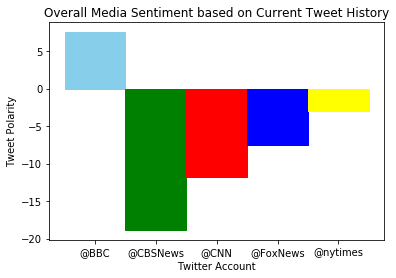

In [36]:
bar = plt.bar(index ,polarity, bar_width, edgecolor = 'black')
bar[0].set_color('skyblue')
bar[1].set_color('green')
bar[2].set_color('red')
bar[3].set_color('blue')
bar[4].set_color('yellow')
plt.xlabel('Twitter Account')
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment based on Current Tweet History')
plt.xticks(index,source_accounts)
plt.show()